**Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable. **

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
bos.columns = boston.feature_names

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos['Price'] = boston.target

In [9]:
X = bos.drop('Price',axis=1)
Y = bos['Price']

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#initialize the model
lm = LinearRegression()

In [12]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#Fitting a linear regression model
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print('Estimated Beta coeficcient : ' , lm.coef_)

Estimated Beta coeficcient :  [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]


In [15]:
print ('Number of Coefficients:', len(lm.coef_))

Number of Coefficients: 13


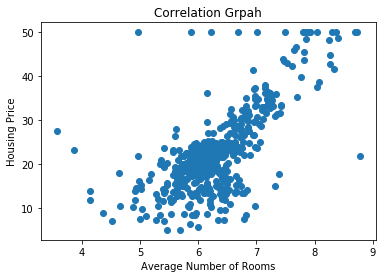

In [16]:
plt.scatter(bos.RM,bos.Price)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Housing Price')
plt.title('Correlation Grpah')
plt.show()

In [17]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

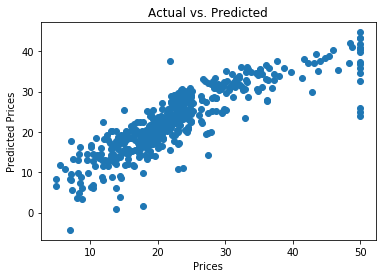

In [18]:
plt.scatter(bos.Price,lm.predict(X))
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted')
plt.show()

In [19]:
#error calculation
np.mean((bos.Price-lm.predict(X))**2)

21.897779217687486

In [20]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,bos.Price,test_size=0.25,random_state=1234)

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [22]:
lm = LinearRegression() #again initialize using the training data set

In [23]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
pred_t = lm.predict(x_train) #training prediction
pred_test = lm.predict(x_test) # test case prediction

In [26]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train - lm.predict(x_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test -lm.predict(x_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 21.134042731567785
Fit a model X_train, and calculate MSE with X_test, Y_test: 27.370763719870695


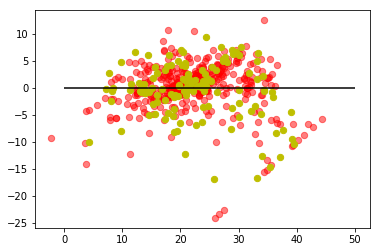

In [28]:
plt.scatter(lm.predict(x_train),lm.predict(x_train)- y_train,c='r',s=40,alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test)- y_test,c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.show()

In [29]:
# regression coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-9.66378735e-02  6.31080432e-02 -1.38069045e-02  2.84516261e+00
 -2.19347661e+01  2.40835980e+00  2.45246610e-03 -1.89020994e+00
  3.56217021e-01 -1.27942145e-02 -1.05991197e+00  1.02040679e-02
 -5.63773228e-01]


In [30]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lm.score(x_test, y_test)))

Variance score: 0.7323523347366839


In [31]:
# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')

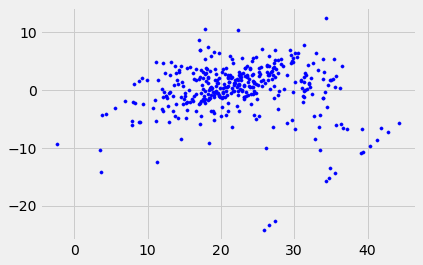

In [36]:
## plotting residual errors in training data
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train,
color = "blue", s = 10, label = 'Train data')